<a href="https://colab.research.google.com/github/PhanTung-06/CS114.L21/blob/main/CS114.L21/Sarcarm_headlines/Train/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRE-PROCESSING DATA

## Import Libraries

In [ ]:
%cd /content/drive/MyDrive/CS114/Crawl_Sarcarm_Headlines

/content/drive/MyDrive/CS114/Crawl_Sarcarm_Headlines


In [ ]:
import json
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import nltk
import string
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import numpy
import ast
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Processing Data Train

In [ ]:
df = pd.read_json('/content/drive/MyDrive/CS114/Crawl_Sarcarm_Headlines/sarcasm_headlines_dataset.json',lines=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41510 entries, 0 to 41509
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  41510 non-null  object
 1   headline      41510 non-null  object
 2   is_sarcastic  41510 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 973.0+ KB


In [ ]:
df.drop(columns='article_link',inplace=True)

In [ ]:
df = df[~df.index.duplicated()]

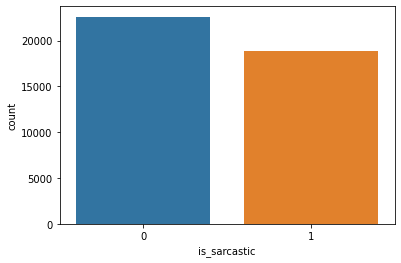

In [ ]:
sns.countplot(x='is_sarcastic',data =df)
plt.show()

In [ ]:
df['headline'] = [entry.lower() for entry in df['headline']]

In [ ]:
df['headline'] = [word_tokenize(entry) for entry in df['headline']]

In [ ]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [ ]:
def process_word(df):
  for index,entry in enumerate(df['headline']):
      # Declaring Empty List to store the words that follow the rules for this step
      Final_words = []
      # Initializing WordNetLemmatizer()
      word_Lemmatized = WordNetLemmatizer()
      # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
      for word, tag in pos_tag(entry):
          # Below condition is to check for Stop words and consider only alphabets
          if word not in stopwords.words('english') and word.isalpha():
              word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
              Final_words.append(word_Final)
      # The final processed set of words for each iteration will be stored in 'headline_process'
      df.loc[index,'headline_process'] = str(Final_words)
  df['headline'] = df['headline_process']
  df.drop(columns='headline_process',inplace=True)

In [ ]:
process_word(df)

In [ ]:
df

,headline,is_sarcastic
0,"['matt', 'damon', 'ask', 'u', 'tv', 'host', 'h...",1
1,"['denzel', 'star', 'new', 'revoltingly', 'viol...",1
2,"['big', 'pharma', 'feeling', 'persecute', 'cal...",1
3,"['nation', 'city', 'resident', 'nsw', 'surpris...",1
4,"['gun', 'enthusiast', 'outrage', 'joe', 'biden...",1
...,...,...
41505,"['dad', 'cry', 'joy', 'reunite', 'son', 'year']",0
41506,"['astronaut', 'alan', 'bean', 'fourth', 'man',...",0
41507,"['hilarious', 'meme', 'erupt', 'twitter', 'ire...",0
41508,"['roman', 'abramovich', 'leave', 'uk', 'pm', '...",0


## Processing data Test - Nhóm Hoàng Xuân Vũ

In [ ]:
NationalPost = pd.read_csv('/content/drive/MyDrive/CS114/Crawl_Sarcarm_Headlines/NationalPost.csv')
NewsBiscuit = pd.read_csv('/content/drive/MyDrive/CS114/Crawl_Sarcarm_Headlines/NewsBiscuit.csv')
# TheTrueNorthTime = pd.read_csv('/content/drive/MyDrive/CS114/Crawl_Sarcarm_Headlines/TheTrueNorthTime.csv')

In [ ]:
df_test = [NewsBiscuit,NationalPost]
df_test = pd.concat(df_test)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14451 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    14451 non-null  int64 
 1   headline      14451 non-null  object
 2   article_link  14451 non-null  object
 3   is_sarcastic  14451 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 564.5+ KB


In [ ]:
df_test.drop(columns='Unnamed: 0',inplace=True)
df_test.drop(columns='article_link',inplace=True)

In [ ]:
df_test

,headline,is_sarcastic
0,Southgate selects 26 goalkeepers,1
1,Hospitality Crisis: BBC to Show “Great British...,1
2,China says ‘nothing to see here’ on Tiananmen ...,1
3,Top Gear presenters to pick up remaining audie...,1
4,British holidaymakers jubilant as budget desti...,1
...,...,...
9995,Federal budget 2021 by the numbers: From a $...,0
9996,China's Xinjiang actions could be crimes aga...,0
9997,Soccer-Reaction to major European clubs anno...,0
9998,Israel to buy millions of Pfizer COVID-19 va...,0


In [ ]:
df_test.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14451 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      14451 non-null  object
 1   is_sarcastic  14451 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 338.7+ KB


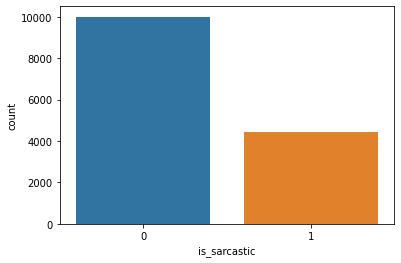

In [ ]:
sns.countplot(x='is_sarcastic',data =df_test)
plt.show()

In [ ]:
df_test['headline'] = [entry.lower() for entry in df_test['headline']]
df_test['headline'] = [word_tokenize(entry) for entry in df_test['headline']]

In [ ]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [ ]:
df_test = df_test[~df_test.index.duplicated()]

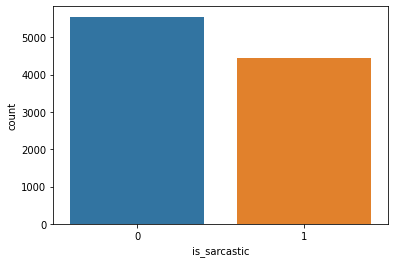

In [ ]:
sns.countplot(x='is_sarcastic',data =df_test)
plt.show()

In [ ]:
process_word(df_test)

In [ ]:
df_test

,headline,is_sarcastic
0,"['southgate', 'selects', 'goalkeeper']",1
1,"['hospitality', 'crisis', 'bbc', 'show', 'grea...",1
2,"['china', 'say', 'nothing', 'see', 'tiananmen'...",1
3,"['top', 'gear', 'presenter', 'pick', 'remain',...",1
4,"['british', 'holidaymaker', 'jubilant', 'budge...",1
...,...,...
9995,"['federal', 'budget', 'number', 'minimum', 'wa...",0
9996,"['china', 'xinjiang', 'action', 'could', 'crim...",0
9997,"['major', 'european', 'club', 'announce', 'bre...",0
9998,"['israel', 'buy', 'million', 'pfizer', 'vaccin...",0


## Word embedding with TFIDF

In [ ]:
# X_train = df['headline'].values
# Y_train = df['is_sarcastic'].values
# X_test = df_test['headline'].values
# Y_test = df_test['is_sarcastic'].values

In [ ]:
x = df['headline'].values
y = df['is_sarcastic'].values
X_train , X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2) 

In [ ]:
vec = TfidfVectorizer()

In [ ]:
vec.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
x_train = vec.transform(X_train)
x_test = vec.transform(X_test)

In [ ]:
x_train

<33208x20546 sparse matrix of type '<class 'numpy.float64'>'
	with 275086 stored elements in Compressed Sparse Row format>

# Train

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
score_test = lr.score(x_test,Y_test)

In [ ]:
score_test

0.9014695254155625

In [ ]:
score_train = lr.score(x_train, Y_train)

In [ ]:
score_train

0.9381474343531679

In [ ]:
predict = lr.predict(x_test)

In [ ]:
predict

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
Y_test

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.svm import SVC
sv = SVC()

In [ ]:
sv.fit(x_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
score_test = sv.score(x_test, Y_test)

In [ ]:
score_test

0.9118284750662491